### Notes

Perform Text Classification on the data (sentiment analysis). The tweets have been pulled from Twitter and manual tagging has been done then. The names and usernames have been given codes to avoid any privacy concerns.

Columns:
1) Location

2) Tweet At

3) Original Tweet

4) Label

- Do a word cloud 
- Use Regex 

Tasks
Locations - Find a way to clean into US / UK etc. 

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

In [3]:
x_train = pd.read_csv('Corona_NLP_train.csv')

In [4]:
x_test = pd.read_csv('Corona_NLP_test.csv')

In [5]:
x_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
x_train.shape

(41157, 6)

In [7]:
x_test.shape

(3798, 6)

In [8]:
x_train.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [9]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


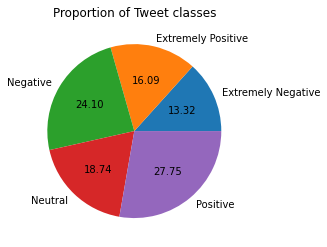

In [10]:
# What are the proportions of the different classes of tweet

x_train.groupby('Sentiment').size().plot(kind='pie', autopct='%.2f')
plt.ylabel("")
plt.title('Proportion of Tweet classes')
plt.show()

The majority class is positive with 27.75%, shortly ahread of negative at 24.1%.
Model Baseline: 27.75

In [11]:
y_train = x_train.pop('Sentiment')

In [12]:
x_train = x_train.OriginalTweet

In [13]:
y_test = x_test.pop('Sentiment')

In [14]:
x_test = x_test.OriginalTweet

In [15]:
cvec = CountVectorizer(strip_accents = 'ascii', stop_words = 'english', 
                       token_pattern='\w+')
cvec.fit(x_train)

CountVectorizer(stop_words='english', strip_accents='ascii',
                token_pattern='\\w+')

In [16]:
cvec.transform(x_train)
cvec.transform(x_test)

<3798x79119 sparse matrix of type '<class 'numpy.int64'>'
	with 68148 stored elements in Compressed Sparse Row format>

In [17]:
cv_train = pd.DataFrame(cvec.transform(x_train).toarray(),
                  columns=cvec.get_feature_names_out())

cv_train

,0,00,000,0000,0000009375,0000hrs,000162,00042,0008,000cr,...,zzthfswosr,zztow7ccit,zztubebesn,zzvx5hmmom,zzwmstfzip,zzwuf0mpps,zzwwitjwfa,zzxwzxhc2v,zzz,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
cv_test = pd.DataFrame(cvec.transform(x_test).toarray(),
                  columns=cvec.get_feature_names_out())

cv_test

,0,00,000,0000,0000009375,0000hrs,000162,00042,0008,000cr,...,zzthfswosr,zztow7ccit,zztubebesn,zzvx5hmmom,zzwmstfzip,zzwuf0mpps,zzwwitjwfa,zzxwzxhc2v,zzz,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
def model_fitter(model, X_train, y_train, X_test, y_test, cv=5):
    model.fit(X_train, y_train)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv)
    print(cv_scores)
    cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=cv))
    training_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    return 'Mean cv score = {}, training score = {}, test score = {}.'.format(cv_score, training_score, test_score)

In [ ]:
lr = LogisticRegression(multi_class='ovr', max_iter=1000)

lr.fit(cv_train, y_train)

## EDA 

## Data Cleaning and pre-processing

In [ ]:
us_places = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'United States', 'USA']

def usa_location_sort(x):
    try:
        for i in x.split(' '):
            if i in us_places:
                return 'USA'
            else:
                return x 
    except:
        return x
        
df.Location.map(usa_location_sort).value_counts()

In [ ]:
cvec = CountVectorizer(strip_accents = 'ascii', stop_words = 'english', 
                       token_pattern='\w+') 
df_cv = cvec.fit_transform(x_train.OriginalTweet)

In [ ]:
type(df_cv)

In [ ]:
x_train = pd.DataFrame(df_cv)